<a href="https://colab.research.google.com/github/KUspanish/SPN_DH/blob/main/%5BHN%5D_Python_for_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import re
import matplotlib.pyplot as plt
import gensim
from gensim import models
from gensim.models import Phrases, CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary

load data

In [21]:
from google.colab import files
a = files.upload()
fn = list(a.keys())[0]
import pandas as pd
df_news = pd.read_csv(fn)

Saving a-machado-(CLEAN)-Revisado3-(solo libros)-nuevo.csv to a-machado-(CLEAN)-Revisado3-(solo libros)-nuevo (1).csv


clean-up

In [22]:
black_list = [
                                  "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z", # 개별 알파벳(alfabeto) 
                                       
                                 "al", "del","de","en", "hacia", "por", "para", "entre",'sobre','según', #전치사(preposiciones)
                                 "con","comigo","contigo", "consigo", "sin",

                                 'cual', 'cuál', 'cuales', 'cuáles', 'cualquier', 'cualquiera', 'cualquieras', #관계사(relativos) & 의문사(interrogativos) (2)
                                 'cuan', 'cuán', 'cuando', 'cuándo', 'cuanta','cuánta', 'cuantas', 'cuántas', 'cuanto', 'cuánto', 'cuantos', 'cuántos',   #관계사(relativos) & 의문사(interrogativos) (1)
                                 'donde', 'dónde', 'adonde', 'adónde','como', 'cómo',                                  #관계사(relativos) & 의문사(interrogativos) (3)
                                 'que', 'qué', 'quien', 'quién', 'quienes', 'quiénes','quienesquiera', 'quienquiera', #관계사(relativos) & 의문사(interrogativos) (4)
                                 'cuyo', 'cuya','cuyos','cuyas', #관계사(relativos) & 의문사(interrogativos) (4)   

                                 'el', 'la', 'las', 'le', 'les', 'lo', 'los', 'un', 'una', 'unas', 'uno', 'unos', #관사(articulos)
                                 'yo', 'me', 'mi', 'mí', 'mia', 'mía', 'mias', 'mías','mio','mío', 'mios', 'míos', 'mis', #대명사(prombres)-1S
                                 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', #대명사(prombres)-1P
                                 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'os', #대명사(prombres)-2P
                                 'él', 'ella', 'ellas', 'ello', 'ellos', #대명사(prombres)-3S (1)
                                 'ud', 'uds', 'usted','ustedes', 'vd', 'vds', 'se', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', #대명사(prombres)-3S (2)
                                 'te', 'ti', 'tí', 'tu', 'tú', 'tus', 'tuya', 'tuyas', 'tuyo', 'tuyos', #대명사(prombres)-2S

                                 #'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas','aquel', 'aquella', 'aquellos', 'aquellas', #지시사(demostrativos)

                                 'era', 'erais', 'eramos', 'éramos', 'eran', 'eras',  #SER 동사활용형(1)
                                 'eres', 'es', 'sea', 'seáis', 'seamos', 'sean', 'seas','sois', 'somos','son', 'soy', #SER 동사활용형(2)
                                 'fue', 'fué', 'fui', 'fuí', 'fuimos', 'fuiste', 'fuisteis', #SER 동사활용형(3)
                                 'fuera', 'fuerais', 'fuéramos', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuésemos','fuesen', 'fueses', #SER 동사활용형(4)
                                 'será', 'serán', 'serás', 'seré', 'seréis', 'seremos', #SER 동사활용형(5)
                                 'sería', 'seríais', 'seríamos', 'serían', 'serías', #SER 동사활용형(6)
                                 'sido', 'siendo', #SER 동사활용형(7)

                                 'estar', 'está', 'estais', 'estáis', 'estamos', 'estan', 'están','estás', 'estoy',  #ESTAR 동사활용형(1)
                                 'estaba', 'estabais', 'estábamos', 'estaban', 'estabas', #ESTAR 동사활용형(2)
                                 'estada', 'estadas', 'estando', 'estad', #ESTAR 동사활용형(3)
                                 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaremos', #ESTAR 동사활용형(4)
                                 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', #ESTAR 동사활용형(5)
                                 'esté', 'estéis', 'estemos', 'estén', 'estés', #ESTAR 동사활용형(6) 
                                 'estuve', 'estuviera', 'estuvierais', 'estuviéramos', 'estuvieran', 'estuvieras', 'estuvieron', #ESTAR 동사활용형(7)
                                 'estuviese', 'estuvieseis', 'estuviésemos', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo',  #ESTAR 동사활용형(8)

                                 'haber', 'ha', 'habéis', 'han', 'has', 'hay', 'he', 'hemos',  #HABER 동사활용형(1)
                                 'habia', 'había', 'habíais', 'habíamos', 'habían', 'habías',  #HABER 동사활용형(2)
                                 'habida', 'habidas', 'habido', 'habidos', 'habiendo',         #HABER 동사활용형(3)
                                 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habremos',  #HABER 동사활용형(4)
                                 'habría', 'habríais', 'habríamos', 'habrían', 'habrías',      #HABER 동사활용형(5)
                                 'haya', 'hayáis', 'hayamos', 'hayan', 'hayas',                #HABER 동사활용형(6)
                                 'hube', 'hubimos', 'hubiste', 'hubisteis', 'hubo',            #HABER 동사활용형(7)
                                 'hubiera', 'hubierais', 'hubiéramos', 'hubieran', 'hubieras', 'hubieron',  #HABER 동사활용형(8) 
                                 'hubiese', 'hubieseis', 'hubiésemos', 'hubiesen', 'hubieses', #HABER 동사활용형(9) 

                                 'ni','no','jamás','nunca','nada','ningún','ninguna','ninguno', #부정어(negativos)
                                 'pero','mas', 'aunque','pues','porque','si','sí', #접속사(conjunciones)
                                 'algo','algún','alguna','algunas','alguno','algunos', #부정어(indefinidos)
                                 'embargo',                                     #기타(etc)                                                                   ))         
  
                                   "LBR",
                                   "ttl",
                                   "mtl",
                                   "ftl",
                                   "=","===============================================",
                                   "01","02","03","04","05","06","07","08","09"]

In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('spanish'))
additional_stopwords=set(black_list)
stopwords = stop.union(additional_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import spacy
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-01 08:13:36.939513: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-01 08:13:36.943923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-01 08:13:36.943974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [25]:
def lemmatization(texts):
    texts_out = [token.text for token in nlp(texts) if token.text not in black_list and len(token.text)>2]
    return texts_out

In [26]:
# Detect phrases, based on collected collocation counts. for example, 'New York'->'new_york' Adjacent words that appear together more frequently than expected are joined together with the _ character.
bigram = gensim.models.Phrases(df_news.texto.to_list())

In [27]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  # 재조합해서 lemmatize한 list
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

In [28]:
# df_news['texto']

0      Está en la sala familiar, sombría, \ny entre n...
1      He andado muchos caminos, \nhe abierto muchas ...
2      La plaza y los naranjos encendidos \ncon sus f...
3      Tierra le dieron una tarde horrible \ndel mes ...
4      Una tarde parda y fría \nde invierno. Los cole...
                             ...                        
561    El ángel que sabía\nsu secreto salió a Martín ...
562    Y vio la musa esquiva,\nde pie junto a su lech...
563    Viví, dormí, soñé y hasta he creado\n—pensó Ma...
564    Y sucedió a la angustia la fatiga,\nque siente...
565    ¡Oh cámaras del tiempo y galerías\ndel alma! ¡...
Name: texto, Length: 566, dtype: object

In [30]:
df_news['texto'] = df_news['texto'].apply(cleaner)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


청소끝..!

prepare corpus for gensim topic modeling

In [31]:
dictionary = Dictionary(df_news['texto'].to_list()) #'texto'칼럼 속에 있는 것을 리스트로...
dictionary.compactify() #?? 
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify() #??

corpus = [dictionary.doc2bow(text) for text in df_news['texto'].to_list()] # 단어를 숫자로.. 

#모델의 입력부..

In [34]:
corpus

[[(0, 2),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [32]:
type(corpus) #corpus는 리스트

list

In [33]:
len(corpus)

566

# Evaluate models

preparing useful functions

a function to display topics better (for HDP, LSI, LDA)

In [38]:
def display_topics(model, model_type): # for all models
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

a function to evaluate the number of topics (for LSI, LDA only)

In [39]:
def evaluate_graph(dictionary, corpus, texts, limit, model): # for LSI, LDA
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

1. Hierarchical Dirichlet process Model

In [40]:
import time
time.clock = time.time
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

In [41]:
hdpmodel.show_topics()

[(0,
  '0.003*ruina + 0.003*tregua + 0.003*ascua + 0.003*presente + 0.003*llano + 0.002*quedando + 0.002*verdadero + 0.002*monta + 0.002*carne + 0.002*verdugo + 0.002*debe + 0.002*corazones + 0.002*dicen + 0.002*lloro + 0.002*remanso + 0.002*historia + 0.002*miedo + 0.002*yunques + 0.002*sue + 0.002*guitarra'),
 (1,
  '0.003*salon + 0.003*madres + 0.003*ausente + 0.002*alta + 0.002*respondi + 0.002*ofrece + 0.002*clamor + 0.002*coche + 0.002*mudas + 0.002*verdades + 0.002*cuca + 0.002*cien + 0.002*corbata + 0.002*huerta + 0.002*paso + 0.002*cuida + 0.002*vendras + 0.002*doctor + 0.002*marcha + 0.002*cruel'),
 (2,
  '0.003*alcores + 0.003*sierra + 0.002*rueda + 0.002*miras + 0.002*ruise + 0.002*grandmontagne + 0.002*espuma + 0.002*mirtos + 0.002*mayor + 0.002*ilumina + 0.002*manchan + 0.002*perfume + 0.002*cuarto + 0.002*arrugada + 0.002*ventana + 0.002*logica + 0.002*transparente + 0.002*lechuzavolar + 0.002*pecado + 0.002*arrojando'),
 (3,
  '0.003*blasfemo + 0.003*barca + 0.003*polvo

In [43]:
display_topics(hdpmodel, model_type='hdp')

Topic 0:
ruina  tregua  ascua  presente  llano  quedando  verdadero  monta  carne  verdugo 

Topic 1:
salon  madres  ausente  alta  respondi  ofrece  clamor  coche  mudas  verdades 

Topic 2:
alcores  sierra  rueda  miras  ruise  grandmontagne  espuma  mirtos  mayor  ilumina 

Topic 3:
blasfemo  barca  polvorientos  verso  malandanza  mustio  luna  helado  ambas  corren 

Topic 4:
claro  casi  historias  hondo  parques  riel  cara  vicio  salamanca  diosa 

Topic 5:
tacha  huella  empu  ciruelos  vengadora  propio  hilera  repiquetean  heces  torreones 

Topic 6:
aborrascado  alzo  hamlet  valles  verdaderas  abrio  salduero  ocaso  lejanos  bien 

Topic 7:
hordas  noches  tajamares  latir  platea  ventanas  mercaderes  viaje  cuento  ayer 

Topic 8:
maduro  grotesca  pobre  tosca  vas  importa  prendida  lienzos  llega  siembra 

Topic 9:
claro  huella  tic  mason  anoche  aspero  copia  claros  pierde  moreno 

Topic 10:
lejanos  leyendas  oido  almendro  barrancas  conquista  sayal 

2. Latent Semantic Indexing model

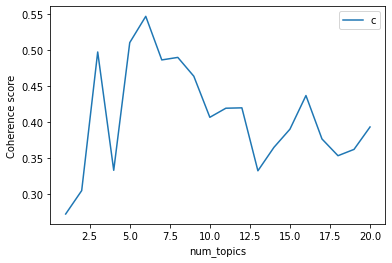

In [46]:
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lsi")

In [47]:
display_topics(lmlist_lsi[5], model_type='lsi')

Topic 0:
tic agua mar sue tierra tarde sol corazon dia sombra 

Topic 1:
tic luna sombra tierra sue tiempo agua tarde amor vida 

Topic 2:
luna sombra ora tierra noche castilla tic mar abril espa 

Topic 3:
tarde fuente verano luna agua espa pena clara hermano castilla 

Topic 4:
espa tierra campo paz guerra sol alma ana bajo hoy 

Topic 5:
claro mar tierra agua castilla dos bajo casa sue amor 



3. Latent Dirichlet Allocation Model

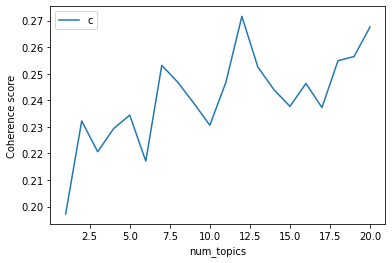

In [48]:
lmlist_lda, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lda")

In [50]:
display_topics(lmlist_lda[6], model_type='lda')

Topic 0:
corazon sue tarde tierra viento agua tiempo campo viejo hoy 

Topic 1:
mar sue noche ojos tierra agua espa amor blanca luz 

Topic 2:
sue sol dios sombra alma campo corazon agua bajo claro 

Topic 3:
claro tierra ojos alma tarde hoy agua bajo dia luna 

Topic 4:
mar sol sue amor tierra luna dia tarde agua corazon 

Topic 5:
tierra luna mano camino tarde campo bajo amor alvargonzalez hace 

Topic 6:
agua tierra corazon sol amor dios tarde dos espa dia 



# select a best model for LSI and LDA and report the summary of all three models (HDP, LSI, LDA)

In [51]:
lsimodel = lmlist_lsi[5]
ldamodel = lmlist_lda[6]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [54]:
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() 
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() 
lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

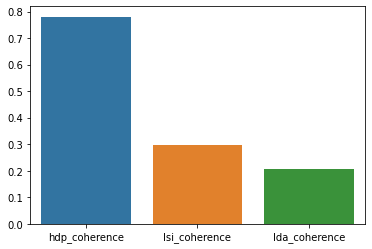

In [55]:
import seaborn as sns

coherences = [hdp_coherence, lsi_coherence, lda_coherence]
n = len(coherences)
x = ['hdp_coherence', 'lsi_coherence', 'lda_coherence']
sns.barplot(x, coherences)

# Assign a dominant topic to each document (with LDA selected)

In [66]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'] #document에 dominant topic매칭..

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [67]:
# function 실행..

df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['texto'].to_list())

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(500)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4979,"corazon, sue, tarde, tierra, viento, agua, tie...","[sala, familiar, sombria, querido, hermano, su..."
1,1,3.0,0.9849,"claro, tierra, ojos, alma, tarde, hoy, agua, b...","[andado, caminos, abierto, muchas, veredas, na..."
2,2,4.0,0.9669,"mar, sol, sue, amor, tierra, luna, dia, tarde,...","[plaza, naranjos, encendidos, frutas, redondas..."
3,3,1.0,0.5880,"mar, sue, noche, ojos, tierra, agua, espa, amo...","[tierra, dieron, tarde, horrible, mes, julio, ..."
4,4,4.0,0.9809,"mar, sol, sue, amor, tierra, luna, dia, tarde,...","[tarde, parda, fria, invierno, colegiales, est..."
...,...,...,...,...,...
495,495,0.0,0.9494,"corazon, sue, tarde, tierra, viento, agua, tie...","[plaza, torrela, torre, balconel, balcon, dama..."
496,496,0.0,0.8568,"corazon, sue, tarde, tierra, viento, agua, tie...","[calle, celosen, veinte, rejas, otrohablando, ..."
497,497,2.0,0.7137,"sue, sol, dios, sombra, alma, campo, corazon, ...","[malos, sue, despertare]"
498,498,3.0,0.5712,"claro, tierra, ojos, alma, tarde, hoy, agua, b...","[despertarancampanas, albaque, sonando]"


# assign a specific name to a topic and possible analyses

In [68]:
label_dicc = {0:'TEMA1', 1:'TEMA2', 2:'TEMA3', 3: 'TEMA4', 4:'TEMA5', 5:'TEMA6', 6:'TEMA7'} 
#              7:'TEMA8', 8:'TEMA9', 9: 'TEMA10', 10:'TEMA11', 11:'TEMA12'}
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
df_news['labels'] = df_dominant_topic['Dominant_Topic']

Let's examine some text and its topics.

In [69]:
df_news[ df_news['labels'] == 'TEMA5'].head().texto

2     [plaza, naranjos, encendidos, frutas, redondas...
4     [tarde, parda, fria, invierno, colegiales, est...
19    [mientras, sombra, pasa, santo, amor, hoy, qui...
23    [sol, globo, fuego, luna, disco, morado, blanc...
32    [amor, recuerdas, dime, aquellos, juncos, tier...
Name: texto, dtype: object

Let's see the distribution of topics to check if the topis are balanced
[no overlap!]

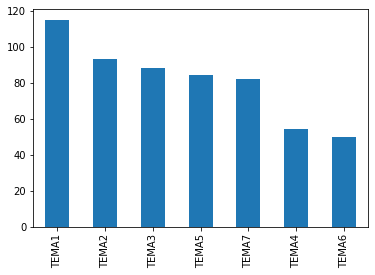

In [70]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

# Final visualization!

In [71]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.2 MB/s eta 0:00:00


In [72]:
import pyLDAvis, pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.021914  0.014693       1        1  21.921750
6      0.003642  0.001499       2        1  19.198431
4     -0.038885  0.014107       3        1  16.246688
1     -0.027952 -0.005764       4        1  14.464974
2     -0.015386  0.012001       5        1  12.648079
3      0.072525  0.042883       6        1   8.170561
5      0.027971 -0.079420       7        1   7.349517, topic_info=       Term        Freq       Total Category  logprob  loglift
10    claro   45.000000   45.000000  Default  30.0000  30.0000
80   tierra  120.000000  120.000000  Default  29.0000  29.0000
40      mar   95.000000   95.000000  Default  28.0000  28.0000
467    ojos   63.000000   63.000000  Default  27.0000  27.0000
758    luna   55.000000   55.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
1      alma    3.312738   60.406114   Topic7  -5.8110  -0.2928
127  sombra    3.266129   65.812865   Topic7  -5.8252  -0.3927
369     ana    3.086659   47.885128   Topic7  -5.8817  -0.1312
77      sue    3.354724  109.084422   Topic7  -5.7984  -0.8712
549   noche    3.049564   54.248407   Topic7  -5.8938  -0.2680

[524 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2405      2  0.313204   abanico
2405      5  0.313204   abanico
2405      6  0.626407   abanico
1852      4  0.317633  abiertas
1852      5  0.317633  abiertas
...     ...       ...       ...
1074      4  0.276104    yertos
1329      5  0.421853   yunques
1664      2  0.173855    zarzas
1664      3  0.521566    zarzas
1664      6  0.173855    zarzas

[1286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 5, 2, 3, 4, 6])